In [1]:
import numpy
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import layers

In [2]:
plt.rcParams['image.cmap'] = 'Reds'

### Load data and normalize it

In [3]:
(x_train, _), (x_test, y_test) = mnist.load_data() #need y_test for easily display all digits
img_width, img_height = x_train[0].shape

In [4]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))/255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))/255

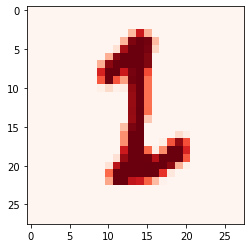

In [5]:
plt.imshow(x_train[70])

#### Find special indices where x_test equals = [0, 1, 2, ...]

In [6]:
special_indices = [0] #first value doesn't matter, 
for i in range(10):
    special_indices.append(numpy.where(y_test==i)[0][0])
    
special_indices

[0, 3, 2, 1, 18, 4, 8, 11, 0, 61, 7]

### Define Autoencoder No. 1

In [7]:
def build_autoencoder(latent_dim):
    #encoder
    encoder = keras.models.Sequential([
#         layers.InputLayer(img_shape),
        layers.Flatten(),
        layers.Dense(50, kernel_initializer='glorot_normal', activation='relu'),
        layers.Dense(latent_dim, kernel_initializer='glorot_normal', activation='relu')
    ])
    
    #decoder
    decoder = keras.models.Sequential([
        layers.Dense(784, kernel_initializer='glorot_normal', activation='relu'),
        layers.Reshape((28,28))
    ])
    
    return encoder, decoder    

In [73]:
IMAGE_SHAPE = x_train.shape[1:]
encoder, decoder = build_autoencoder(latent_dim=2)

inputs = layers.Input(shape=IMAGE_SHAPE)
encoded = encoder(inputs)
decoded = decoder(encoded)

autoencoder = keras.Model(inputs=inputs, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse', run_eagerly=True) #learning_rate is already 0.001 by default

trained_autoencoder = autoencoder.fit(x=x_train, y=x_train, 
                                      epochs=1000,
                                      batch_size=8192, 
                                      validation_data=(x_test, x_test), 
                                      shuffle=True)

Epoch 1/1000
8/8 [==============================] - 0s 36ms/step - loss: 0.1060 - val_loss: 0.1048
Epoch 2/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.1012 - val_loss: 0.1006
Epoch 3/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0975 - val_loss: 0.0968
Epoch 4/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0938 - val_loss: 0.0927
Epoch 5/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.0900 - val_loss: 0.0890
Epoch 6/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0864 - val_loss: 0.0854
Epoch 7/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.0833 - val_loss: 0.0827
Epoch 8/1000
8/8 [==============================] - 0s 31ms/step - loss: 0.0812 - val_loss: 0.0809
Epoch 9/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0796 - val_loss: 0.0795
Epoch 10/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0784 - val_loss: 0.0784
Epoch 11/

8/8 [==============================] - 0s 32ms/step - loss: 0.0715 - val_loss: 0.0718
Epoch 84/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.0714 - val_loss: 0.0718
Epoch 85/1000
8/8 [==============================] - 0s 31ms/step - loss: 0.0714 - val_loss: 0.0718
Epoch 86/1000
8/8 [==============================] - 0s 31ms/step - loss: 0.0714 - val_loss: 0.0718
Epoch 87/1000
8/8 [==============================] - 0s 30ms/step - loss: 0.0714 - val_loss: 0.0717
Epoch 88/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.0714 - val_loss: 0.0717
Epoch 89/1000
8/8 [==============================] - 0s 30ms/step - loss: 0.0714 - val_loss: 0.0717
Epoch 90/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.0714 - val_loss: 0.0717
Epoch 91/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0714 - val_loss: 0.0717
Epoch 92/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0714 - val_loss: 0.0717
Epoch 93/1000


8/8 [==============================] - 0s 30ms/step - loss: 0.0708 - val_loss: 0.0712
Epoch 165/1000
8/8 [==============================] - 0s 31ms/step - loss: 0.0708 - val_loss: 0.0712
Epoch 166/1000
8/8 [==============================] - 0s 31ms/step - loss: 0.0708 - val_loss: 0.0712
Epoch 167/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.0708 - val_loss: 0.0712
Epoch 168/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0708 - val_loss: 0.0712
Epoch 169/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0708 - val_loss: 0.0712
Epoch 170/1000
8/8 [==============================] - 0s 30ms/step - loss: 0.0708 - val_loss: 0.0712
Epoch 171/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.0708 - val_loss: 0.0712
Epoch 172/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0708 - val_loss: 0.0712
Epoch 173/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.0708 - val_loss: 0.0711
Epoch

8/8 [==============================] - 0s 31ms/step - loss: 0.0702 - val_loss: 0.0706
Epoch 246/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0702 - val_loss: 0.0706
Epoch 247/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0702 - val_loss: 0.0706
Epoch 248/1000
8/8 [==============================] - 0s 30ms/step - loss: 0.0702 - val_loss: 0.0706
Epoch 249/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.0702 - val_loss: 0.0706
Epoch 250/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0702 - val_loss: 0.0706
Epoch 251/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0702 - val_loss: 0.0706
Epoch 252/1000
8/8 [==============================] - 0s 31ms/step - loss: 0.0702 - val_loss: 0.0706
Epoch 253/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.0702 - val_loss: 0.0706
Epoch 254/1000
8/8 [==============================] - 0s 30ms/step - loss: 0.0702 - val_loss: 0.0706
Epoch

8/8 [==============================] - 0s 36ms/step - loss: 0.0699 - val_loss: 0.0704
Epoch 327/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0699 - val_loss: 0.0703
Epoch 328/1000
8/8 [==============================] - 0s 35ms/step - loss: 0.0699 - val_loss: 0.0704
Epoch 329/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0699 - val_loss: 0.0703
Epoch 330/1000
8/8 [==============================] - 0s 35ms/step - loss: 0.0699 - val_loss: 0.0703
Epoch 331/1000
8/8 [==============================] - 0s 35ms/step - loss: 0.0699 - val_loss: 0.0703
Epoch 332/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0699 - val_loss: 0.0703
Epoch 333/1000
8/8 [==============================] - 0s 31ms/step - loss: 0.0699 - val_loss: 0.0703
Epoch 334/1000
8/8 [==============================] - 0s 31ms/step - loss: 0.0699 - val_loss: 0.0704
Epoch 335/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0699 - val_loss: 0.0703
Epoch

8/8 [==============================] - 0s 39ms/step - loss: 0.0698 - val_loss: 0.0702
Epoch 408/1000
8/8 [==============================] - 0s 39ms/step - loss: 0.0698 - val_loss: 0.0702
Epoch 409/1000
8/8 [==============================] - 0s 39ms/step - loss: 0.0698 - val_loss: 0.0702
Epoch 410/1000
8/8 [==============================] - 0s 37ms/step - loss: 0.0698 - val_loss: 0.0702
Epoch 411/1000
8/8 [==============================] - 0s 40ms/step - loss: 0.0698 - val_loss: 0.0702
Epoch 412/1000
8/8 [==============================] - 0s 35ms/step - loss: 0.0698 - val_loss: 0.0702
Epoch 413/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0698 - val_loss: 0.0702
Epoch 414/1000
8/8 [==============================] - 0s 37ms/step - loss: 0.0698 - val_loss: 0.0702
Epoch 415/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0698 - val_loss: 0.0702
Epoch 416/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0698 - val_loss: 0.0702
Epoch

8/8 [==============================] - 0s 32ms/step - loss: 0.0697 - val_loss: 0.0701
Epoch 489/1000
8/8 [==============================] - 0s 37ms/step - loss: 0.0697 - val_loss: 0.0701
Epoch 490/1000
8/8 [==============================] - 0s 36ms/step - loss: 0.0697 - val_loss: 0.0701
Epoch 491/1000
8/8 [==============================] - 0s 31ms/step - loss: 0.0697 - val_loss: 0.0701
Epoch 492/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0697 - val_loss: 0.0701
Epoch 493/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0697 - val_loss: 0.0701
Epoch 494/1000
8/8 [==============================] - 0s 35ms/step - loss: 0.0697 - val_loss: 0.0701
Epoch 495/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0697 - val_loss: 0.0701
Epoch 496/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.0697 - val_loss: 0.0701
Epoch 497/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0697 - val_loss: 0.0701
Epoch

8/8 [==============================] - 0s 36ms/step - loss: 0.0696 - val_loss: 0.0701
Epoch 570/1000
8/8 [==============================] - 0s 39ms/step - loss: 0.0696 - val_loss: 0.0701
Epoch 571/1000
8/8 [==============================] - 0s 36ms/step - loss: 0.0696 - val_loss: 0.0701
Epoch 572/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0696 - val_loss: 0.0701
Epoch 573/1000
8/8 [==============================] - 0s 38ms/step - loss: 0.0696 - val_loss: 0.0701
Epoch 574/1000
8/8 [==============================] - 0s 37ms/step - loss: 0.0696 - val_loss: 0.0701
Epoch 575/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0696 - val_loss: 0.0701
Epoch 576/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0696 - val_loss: 0.0701
Epoch 577/1000
8/8 [==============================] - 0s 30ms/step - loss: 0.0696 - val_loss: 0.0701
Epoch 578/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0696 - val_loss: 0.0701
Epoch

8/8 [==============================] - 0s 35ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 651/1000
8/8 [==============================] - 0s 37ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 652/1000
8/8 [==============================] - 0s 38ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 653/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 654/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 655/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 656/1000
8/8 [==============================] - 0s 37ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 657/1000
8/8 [==============================] - 0s 35ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 658/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 659/1000
8/8 [==============================] - 0s 36ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch

8/8 [==============================] - 0s 35ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 732/1000
8/8 [==============================] - 0s 37ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 733/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 734/1000
8/8 [==============================] - 0s 30ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 735/1000
8/8 [==============================] - 0s 38ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 736/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 737/1000
8/8 [==============================] - 0s 31ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 738/1000
8/8 [==============================] - 0s 35ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 739/1000
8/8 [==============================] - 0s 36ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch 740/1000
8/8 [==============================] - 0s 37ms/step - loss: 0.0696 - val_loss: 0.0700
Epoch

8/8 [==============================] - 0s 30ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 813/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 814/1000
8/8 [==============================] - 0s 31ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 815/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 816/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 817/1000
8/8 [==============================] - 0s 37ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 818/1000
8/8 [==============================] - 0s 38ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 819/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 820/1000
8/8 [==============================] - 0s 38ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 821/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch

8/8 [==============================] - 0s 33ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 894/1000
8/8 [==============================] - 0s 37ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 895/1000
8/8 [==============================] - 0s 38ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 896/1000
8/8 [==============================] - 0s 36ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 897/1000
8/8 [==============================] - 0s 37ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 898/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 899/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 900/1000
8/8 [==============================] - 0s 39ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 901/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 902/1000
8/8 [==============================] - 0s 31ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch

8/8 [==============================] - 0s 34ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 975/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0695 - val_loss: 0.0700
Epoch 976/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0695 - val_loss: 0.0699
Epoch 977/1000
8/8 [==============================] - 0s 37ms/step - loss: 0.0694 - val_loss: 0.0698
Epoch 978/1000
8/8 [==============================] - 0s 35ms/step - loss: 0.0693 - val_loss: 0.0698
Epoch 979/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0693 - val_loss: 0.0698
Epoch 980/1000
8/8 [==============================] - 0s 38ms/step - loss: 0.0693 - val_loss: 0.0698
Epoch 981/1000
8/8 [==============================] - 0s 40ms/step - loss: 0.0693 - val_loss: 0.0698
Epoch 982/1000
8/8 [==============================] - 0s 35ms/step - loss: 0.0693 - val_loss: 0.0698
Epoch 983/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0693 - val_loss: 0.0698
Epoch

In [74]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

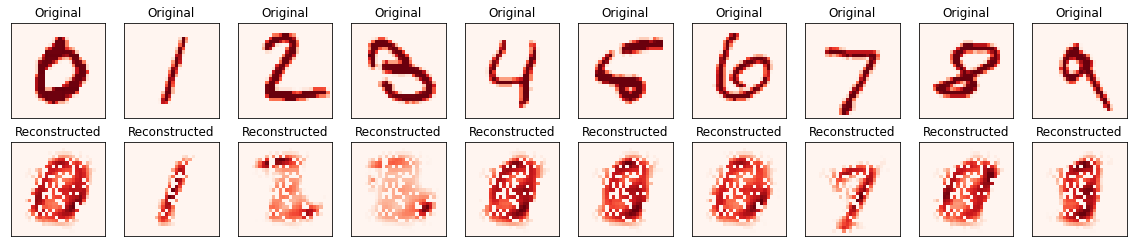

In [75]:
n = 10
plt.figure(figsize=(20,4))
for i in range(1,n+1):
    #Original
    ax1 = plt.subplot(2, n, i)
    plt.imshow(x_test[special_indices[i]])
    plt.title("Original")
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    
    #Decoded
    ax2 = plt.subplot(2, n, i+n)
    plt.imshow(decoded_imgs[special_indices[i]])
    plt.title("Reconstructed")
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

### Define Autoencoder No. 2

In [12]:
encoder2, decoder2 = build_autoencoder(latent_dim=4)

inputs2 = layers.Input(IMAGE_SHAPE)
encoded2 = encoder2(inputs2)
decoded2 = decoder2(encoded2)

autoencoder2 = keras.Model(inputs=inputs2, outputs=decoded2)
autoencoder2.compile(optimizer='adam', loss='mse', run_eagerly=True)

trained_autoencoder2 = autoencoder2.fit(x_train, x_train, 
                                        epochs=100, 
                                        batch_size=8192,
                                        validation_data=(x_test, x_test),
                                        shuffle=True)

Epoch 1/100
8/8 [==============================] - 0s 32ms/step - loss: 0.1064 - val_loss: 0.1044
Epoch 2/100
8/8 [==============================] - 0s 33ms/step - loss: 0.1007 - val_loss: 0.0990
Epoch 3/100
8/8 [==============================] - 0s 31ms/step - loss: 0.0954 - val_loss: 0.0934
Epoch 4/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0902 - val_loss: 0.0883
Epoch 5/100
8/8 [==============================] - 0s 36ms/step - loss: 0.0857 - val_loss: 0.0844
Epoch 6/100
8/8 [==============================] - 0s 32ms/step - loss: 0.0825 - val_loss: 0.0817
Epoch 7/100
8/8 [==============================] - 0s 35ms/step - loss: 0.0803 - val_loss: 0.0798
Epoch 8/100
8/8 [==============================] - 0s 36ms/step - loss: 0.0787 - val_loss: 0.0785
Epoch 9/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0775 - val_loss: 0.0773
Epoch 10/100
8/8 [==============================] - 0s 32ms/step - loss: 0.0765 - val_loss: 0.0763
Epoch 11/100
8/8 [=

Epoch 84/100
8/8 [==============================] - 0s 32ms/step - loss: 0.0539 - val_loss: 0.0536
Epoch 85/100
8/8 [==============================] - 0s 30ms/step - loss: 0.0538 - val_loss: 0.0536
Epoch 86/100
8/8 [==============================] - 0s 35ms/step - loss: 0.0538 - val_loss: 0.0535
Epoch 87/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0538 - val_loss: 0.0535
Epoch 88/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0537 - val_loss: 0.0535
Epoch 89/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0537 - val_loss: 0.0535
Epoch 90/100
8/8 [==============================] - 0s 36ms/step - loss: 0.0537 - val_loss: 0.0534
Epoch 91/100
8/8 [==============================] - 0s 38ms/step - loss: 0.0537 - val_loss: 0.0534
Epoch 92/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0536 - val_loss: 0.0534
Epoch 93/100
8/8 [==============================] - 0s 30ms/step - loss: 0.0536 - val_loss: 0.0534
Epoch 94/1

In [169]:
encoded_imgs2 = encoder2.predict(x_test)
decoded_imgs2 = decoder2.predict(encoded_imgs2)

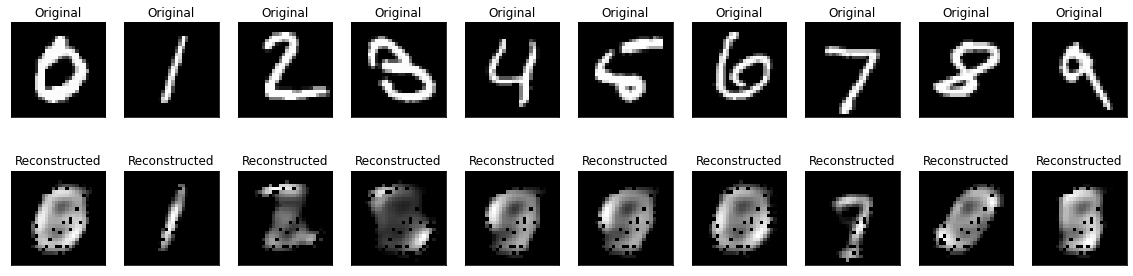

In [170]:
n = 10
plt.figure(figsize=(20,5))
for i in range(1, n+1):
    ax1 = plt.subplot(2, n, i)
    plt.imshow(x_test[special_indices[i]])
    plt.gray()
    plt.title("Original")
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    
    ax2 = plt.subplot(2, n, i+n)
    plt.imshow(decoded_imgs2[special_indices[i]])
    plt.gray()
    plt.title("Reconstructed")
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

### Analysis

In [76]:
# feature_extractor = keras.Model(inputs=autoencoder.inputs, outputs=encoder.layers[-1].output)
features = encoded_imgs

In [86]:
digit_one_indices = numpy.where(y_test==0)[0]
plt.figure(figsize=(20,10))    

for i in digit_one_indices:
    plt.subplot(1,2,2*i-1)
    plt.scatter(features[i][0], features[i][1], c='orange')

plt.subplot(1,2,2)    
plt.imshow(x_test[digit_one_indices[1]])

0
3
2
1
18
4
8
11
0
61
7


ValueError: num must be 1 <= num <= 2, not 5

<Figure size 1440x720 with 0 Axes>

In [98]:
numbers_indices = {}
for d in range(10):
    numbers_indices[d] = [vec for vec in numpy.where(y_test==d)][0]

<ipython-input-109-17120024d99f>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(n,2,h)
<ipython-input-109-17120024d99f>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(n,2,h+1)


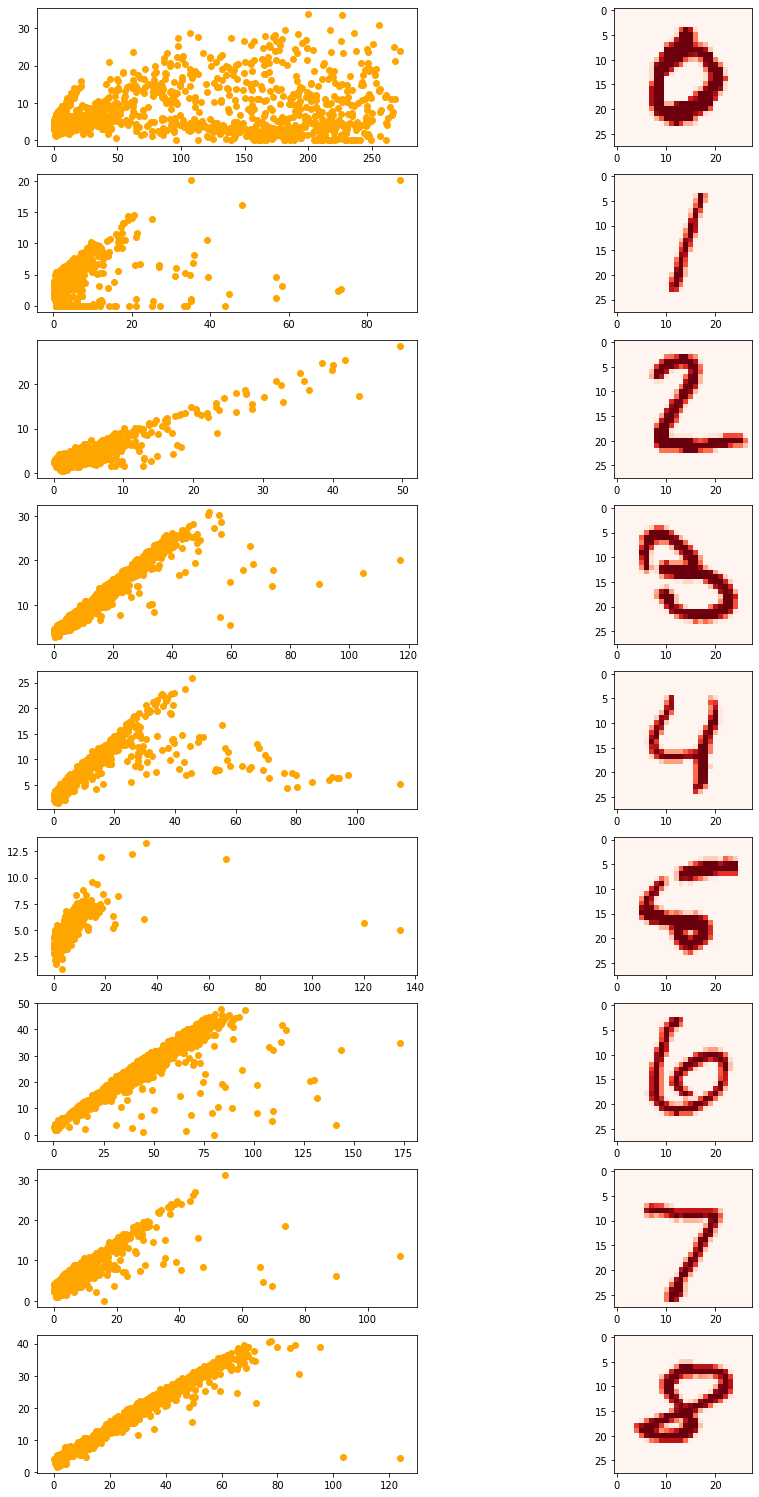

In [109]:
n = len(numbers_indices)
plt.figure(figsize=(15,30))    

plt.subplot(n,2,1)
for i in numbers_indices[0]:
    plt.scatter(features[i][0], features[i][1], c='orange')
    

plt.subplot(n,2,2)    
plt.imshow(x_test[special_indices[0]])

for i in list(numbers_indices.keys())[1:]:
    h = 2*i - 1
    plt.subplot(n,2,h)
    
    for v in numbers_indices[i]:
        plt.scatter(features[v][0], features[v][1], c='orange')

    plt.subplot(n,2,h+1)    
    plt.imshow(x_test[special_indices[i]])